# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import gc ## Collects garbage values to free gpu memory
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


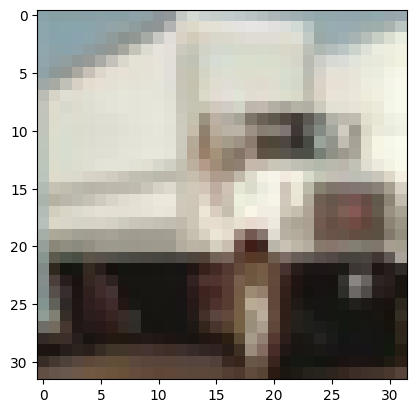

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [8]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))
gc.collect()

c:\Users\Nil\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 11s 5ms/step - loss: 1.7275 - accuracy: 0.3718 - val_loss: 1.4101 - val_accuracy: 0.4937
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4362 - accuracy: 0.4840 - val_loss: 1.3122 - val_accuracy: 0.5343
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3288 - accuracy: 0.5273 - val_loss: 1.2393 - val_accuracy: 0.5685
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2632 - accuracy: 0.5512 - val_loss: 1.2275 - val_accuracy: 0.5624
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2190 - accuracy: 0.5692 - val_loss: 1.0976 - val_accuracy: 0.6143
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1897 - accuracy: 0.5793 - val_loss: 1.1285 - val_accuracy: 0.6036
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1595 - accuracy: 0.5934 - val_loss: 1.1396 - val_accuracy

5054

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [10]:
## Building a model with the pattern above
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

| Model_1 | Model_2 |
| :-: | :-: |
| 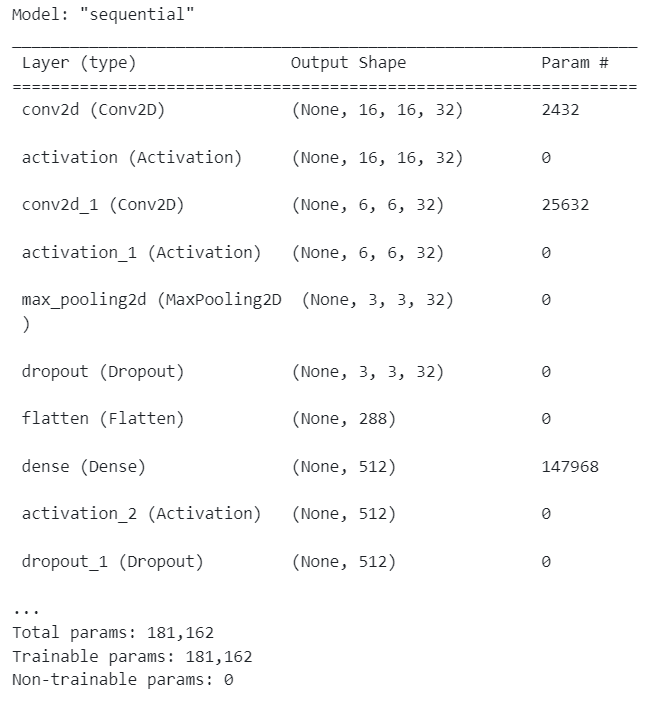 | 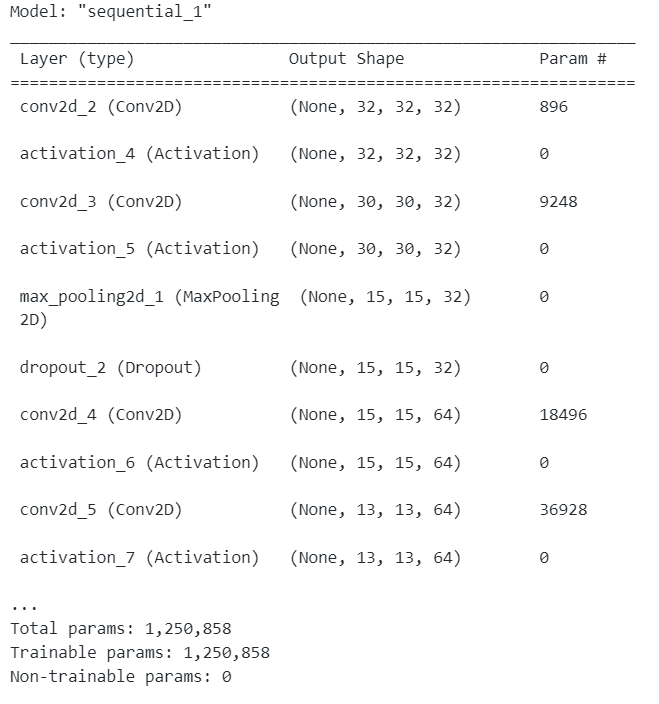 |

In [11]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))
gc.collect()

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5621 - accuracy: 0.4331 - val_loss: 1.2163 - val_accuracy: 0.5667
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1651 - accuracy: 0.5917 - val_loss: 1.0574 - val_accuracy: 0.6259
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0104 - accuracy: 0.6473 - val_loss: 0.9032 - val_accuracy: 0.6823
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9225 - accuracy: 0.6789 - val_loss: 0.8612 - val_accuracy: 0.7059
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8679 - accuracy: 0.6997 - val_loss: 0.7843 - val_accuracy: 0.7310


1454

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

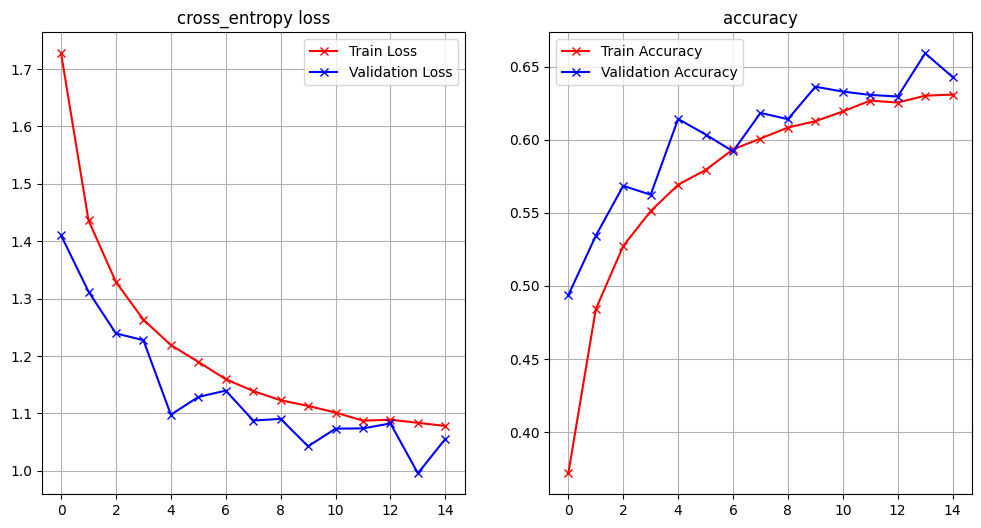

In [13]:
plot_loss_accuracy(history_1)

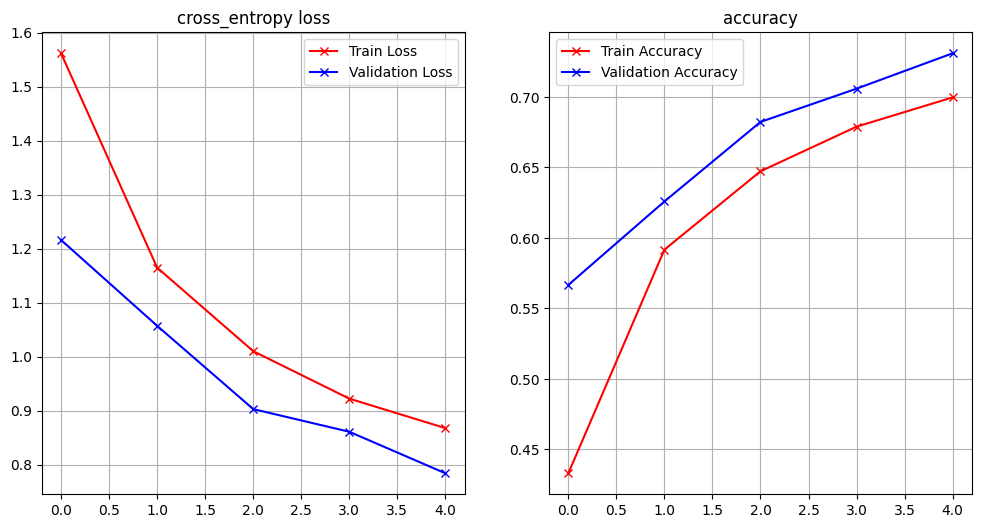

In [14]:
plot_loss_accuracy(history_2)

In [41]:
## Using 5 epochs and a different structure

model_3 = Sequential()

model_3.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 activation_45 (Activation)  (None, 32, 32, 256)       0         
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 16, 16, 256)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 activation_46 (Activation)  (None, 16, 16, 256)       0         
                                                     

In [43]:
batch_size = 200
opt = keras.optimizers.Adam(learning_rate=0.0006)


model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))
gc.collect()

Epoch 1/15
250/250 [==============================] - 23s 79ms/step - loss: 1.6913 - accuracy: 0.3760 - val_loss: 1.2993 - val_accuracy: 0.5318
Epoch 2/15
250/250 [==============================] - 20s 78ms/step - loss: 1.2410 - accuracy: 0.5551 - val_loss: 1.0703 - val_accuracy: 0.6255
Epoch 3/15
250/250 [==============================] - 20s 79ms/step - loss: 1.0379 - accuracy: 0.6330 - val_loss: 0.8966 - val_accuracy: 0.6877
Epoch 4/15
250/250 [==============================] - 20s 79ms/step - loss: 0.9100 - accuracy: 0.6827 - val_loss: 0.7854 - val_accuracy: 0.7290
Epoch 5/15
250/250 [==============================] - 20s 80ms/step - loss: 0.8156 - accuracy: 0.7144 - val_loss: 0.7414 - val_accuracy: 0.7447
Epoch 6/15
250/250 [==============================] - 20s 80ms/step - loss: 0.7414 - accuracy: 0.7409 - val_loss: 0.7127 - val_accuracy: 0.7593
Epoch 7/15
250/250 [==============================] - 20s 80ms/step - loss: 0.6869 - accuracy: 0.7600 - val_loss: 0.6652 - val_accuracy:

3726

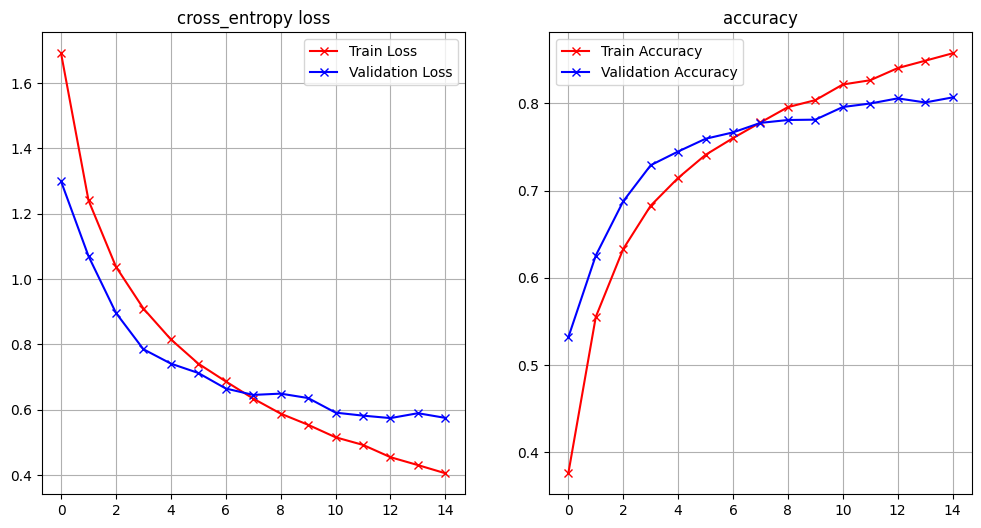

In [44]:
plot_loss_accuracy(history_3)

#### Conclusion

#type your answer here